In [134]:
import functools
from math import sqrt

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
import scipy.stats as sct
import seaborn as sns
from sklearn.datasets import load_boston
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error, median_absolute_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
pd.pandas.set_option('display.max_columns', None)

In [135]:
treino = pd.read_csv('train.csv')
teste = pd.read_csv('test.csv')

In [136]:
for i,c in enumerate(treino.columns):
    print(f"\033[92;1m * \033[mColumn {i}: {c}")

 * Column 0: Unnamed: 0
 * Column 1: NU_INSCRICAO
 * Column 2: NU_ANO
 * Column 3: CO_MUNICIPIO_RESIDENCIA
 * Column 4: NO_MUNICIPIO_RESIDENCIA
 * Column 5: CO_UF_RESIDENCIA
 * Column 6: SG_UF_RESIDENCIA
 * Column 7: NU_IDADE
 * Column 8: TP_SEXO
 * Column 9: TP_ESTADO_CIVIL
 * Column 10: TP_COR_RACA
 * Column 11: TP_NACIONALIDADE
 * Column 12: CO_MUNICIPIO_NASCIMENTO
 * Column 13: NO_MUNICIPIO_NASCIMENTO
 * Column 14: CO_UF_NASCIMENTO
 * Column 15: SG_UF_NASCIMENTO
 * Column 16: TP_ST_CONCLUSAO
 * Column 17: TP_ANO_CONCLUIU
 * Column 18: TP_ESCOLA
 * Column 19: TP_ENSINO
 * Column 20: IN_TREINEIRO
 * Column 21: CO_ESCOLA
 * Column 22: CO_MUNICIPIO_ESC
 * Column 23: NO_MUNICIPIO_ESC
 * Column 24: CO_UF_ESC
 * Column 25: SG_UF_ESC
 * Column 26: TP_DEPENDENCIA_ADM_ESC
 * Column 27: TP_LOCALIZACAO_ESC
 * Column 28: TP_SIT_FUNC_ESC
 * Column 29: IN_BAIXA_VISAO
 * Column 30: IN_CEGUEIRA
 * Column 31: IN_SURDEZ
 * Column 32: IN_DEFICIENCIA_AUDITIVA
 * Column 33: IN_SURDO_CEGUEIRA
 * Column 3

In [137]:
cons = pd.DataFrame({'colunas' : treino.columns,
                    'tipo': treino.dtypes,
                    'missing' : treino.isna().sum(),
                    'size' : treino.shape[0],
                    'unicos': treino.nunique()})
cons['percentual'] = round(cons['missing'] / cons['size'],2)

In [138]:
colunas_numericas = list(cons[(cons['tipo'] != 'object')]['colunas'])

In [139]:
treino[colunas_numericas]

,Unnamed: 0,NU_ANO,CO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,NU_IDADE,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,CO_MUNICIPIO_NASCIMENTO,CO_UF_NASCIMENTO,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_ESCOLA,CO_MUNICIPIO_ESC,CO_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_SURDEZ,IN_DEFICIENCIA_AUDITIVA,IN_SURDO_CEGUEIRA,IN_DEFICIENCIA_FISICA,IN_DEFICIENCIA_MENTAL,IN_DEFICIT_ATENCAO,IN_DISLEXIA,IN_DISCALCULIA,IN_AUTISMO,IN_VISAO_MONOCULAR,IN_OUTRA_DEF,IN_SABATISTA,IN_GESTANTE,IN_LACTANTE,IN_IDOSO,IN_ESTUDA_CLASSE_HOSPITALAR,IN_SEM_RECURSO,IN_BRAILLE,IN_AMPLIADA_24,IN_AMPLIADA_18,IN_LEDOR,IN_ACESSO,IN_TRANSCRICAO,IN_LIBRAS,IN_LEITURA_LABIAL,IN_MESA_CADEIRA_RODAS,IN_MESA_CADEIRA_SEPARADA,IN_APOIO_PERNA,IN_GUIA_INTERPRETE,IN_MACA,IN_COMPUTADOR,IN_CADEIRA_ESPECIAL,IN_CADEIRA_CANHOTO,IN_CADEIRA_ACOLCHOADA,IN_PROVA_DEITADO,IN_MOBILIARIO_OBESO,IN_LAMINA_OVERLAY,IN_PROTETOR_AURICULAR,IN_MEDIDOR_GLICOSE,IN_MAQUINA_BRAILE,IN_SOROBAN,IN_MARCA_PASSO,IN_SONDA,IN_MEDICAMENTOS,IN_SALA_INDIVIDUAL,IN_SALA_ESPECIAL,IN_SALA_ACOMPANHANTE,IN_MOBILIARIO_ESPECIFICO,IN_MATERIAL_ESPECIFICO,IN_NOME_SOCIAL,IN_CERTIFICADO,CO_UF_ENTIDADE_CERTIFICACAO,CO_MUNICIPIO_PROVA,CO_UF_PROVA,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TP_LINGUA,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q005,Q029,Q030,Q031,Q032,Q033,Q034,Q035,Q036,Q037,Q038,Q039,Q040,Q041
0,1,2016,4314902,43,24,0.0,1,1,4314902.0,43.0,1,4,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,4314902,43,1,1,1,1,436.3,495.4,581.2,399.4,1,1.0,120.0,120.0,120.0,80.0,80.0,520.0,3,5.0,5.0,1.0,0.0,0.0,5,5,0,5,5,5,5,5.0
1,2,2016,2304707,23,17,0.0,3,1,2304707.0,23.0,2,0,2,1.0,0,23005157.0,2304707.0,23.0,2.0,1.0,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,2304707,23,1,1,1,1,474.5,544.1,599.0,459.8,1,1.0,140.0,120.0,120.0,120.0,80.0,580.0,5,NaN,NaN,NaN,NaN,NaN,5,5,1,1,1,1,1,NaN
2,3,2016,2304400,23,21,0.0,3,1,2304400.0,23.0,3,0,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,2304400,23,0,0,0,0,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,NaN,NaN,NaN,NaN,NaN,5,5,5,5,5,5,5,NaN
3,4,2016,3304557,33,25,0.0,0,1,3304557.0,33.0,1,9,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,3304557,33,0,0,0,0,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,2.0,0.0,5.0,5.0,5.0,5,5,5,5,2,5,5,5.0
4,5,2016,1302603,13,28,0.0,2,1,1505304.0,15.0,1,4,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,1302603,13,0,0,0,0,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,5.0,4.0,3.0,5.0,4.0,5,5,4,3,1,4,5,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13725,4582,2016,3502903,35,20,0.0,1,1,3552205.0,35.0,1,3,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,3502903,35,1,1,1,1,438.2,419.7,394.5,403.2,0,1.0,120.0,120.0,80.0,80.0,40.0,440.0,4,5.0,5.0,5.0,5.0,5.0,5,5,5,5,5,5,5,NaN
13726,4583,2016,2613800,26,33,0.0,3,2,NaN,NaN,1,10,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [140]:
colunas_numericas2 = ['NU_NOTA_CN','NU_NOTA_CH','NU_NOTA_LC','NU_NOTA_MT','NU_NOTA_COMP1','NU_NOTA_COMP2','NU_NOTA_COMP3','NU_NOTA_COMP4','NU_NOTA_COMP5','NU_NOTA_REDACAO']

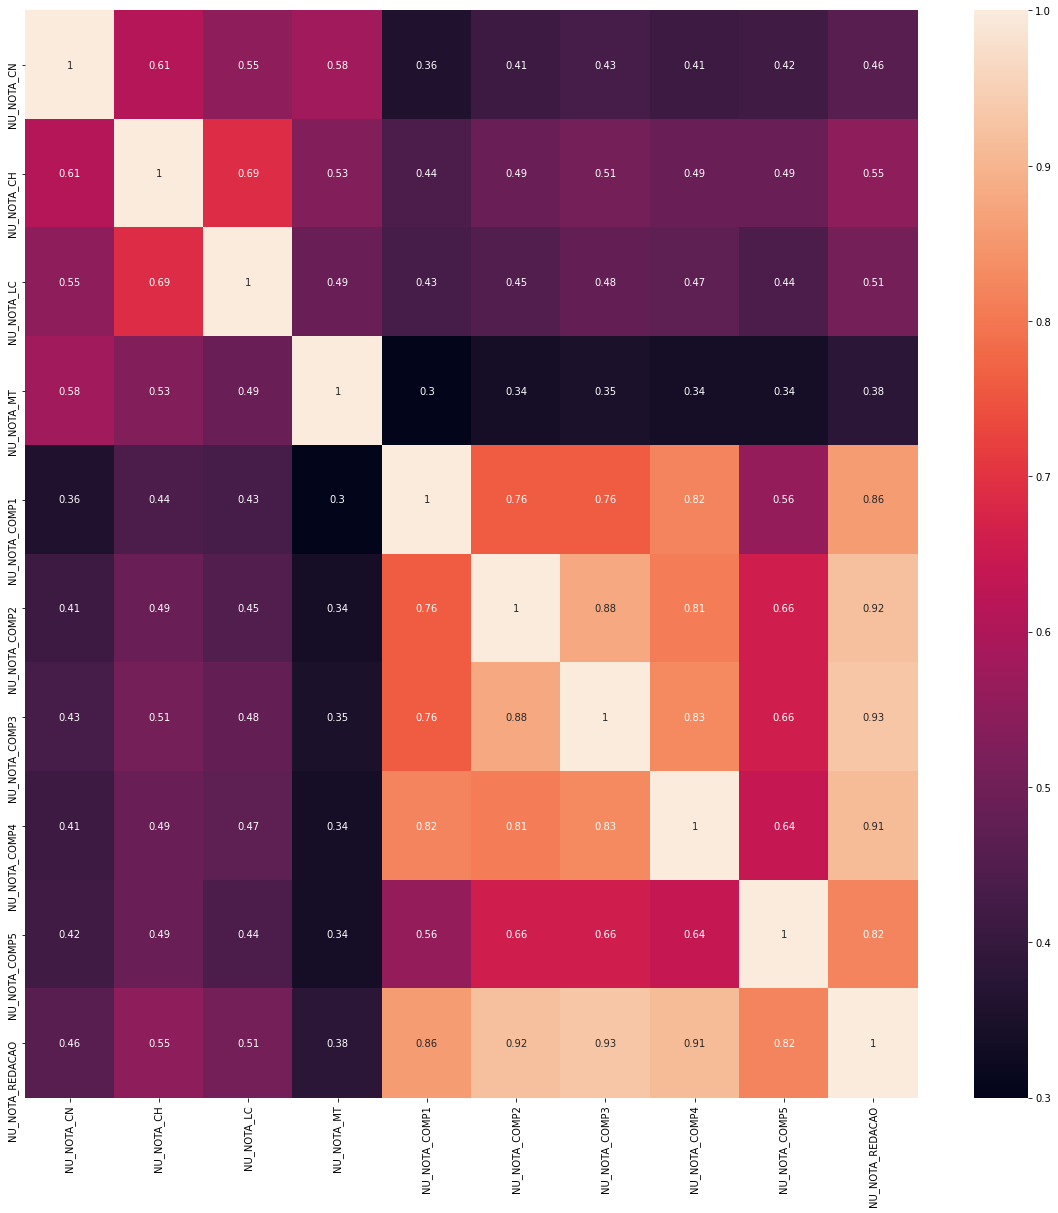

In [141]:
plt.figure(figsize = (20,20))
sns.heatmap(treino[colunas_numericas2].corr().round(2), annot= True)

In [142]:
treino2 = treino[colunas_numericas2]
treino2.update(treino2[colunas_numericas2].fillna(0))
treino2

/home/isabella/snap/jupyter/common/lib/python3.7/site-packages/pandas/core/frame.py:5732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = expressions.where(mask, this, that)


,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO
0,436.3,495.4,581.2,399.4,120.0,120.0,120.0,80.0,80.0,520.0
1,474.5,544.1,599.0,459.8,140.0,120.0,120.0,120.0,80.0,580.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
13725,438.2,419.7,394.5,403.2,120.0,120.0,80.0,80.0,40.0,440.0
13726,423.8,557.9,533.0,452.4,120.0,120.0,120.0,120.0,80.0,560.0
13727,460.5,528.9,569.3,398.0,120.0,120.0,120.0,120.0,120.0,600.0
13728,422.5,621.7,569.0,386.6,100.0,100.0,80.0,80.0,100.0,460.0


In [143]:
treino_target = treino2['NU_NOTA_MT']
treino_target

0        399.4
1        459.8
2          0.0
3          0.0
4          0.0
         ...  
13725    403.2
13726    452.4
13727    398.0
13728    386.6
13729    428.9
Name: NU_NOTA_MT, Length: 13730, dtype: float64

In [144]:
teste

,NU_INSCRICAO,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,TP_DEPENDENCIA_ADM_ESC,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_SURDEZ,IN_DISLEXIA,IN_DISCALCULIA,IN_SABATISTA,IN_GESTANTE,IN_IDOSO,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,CO_PROVA_CN,CO_PROVA_CH,CO_PROVA_LC,CO_PROVA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,TP_LINGUA,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q006,Q024,Q025,Q026,Q027,Q047
0,73ff9fcc02f0a99919906c942c2e1a1042cdcf98,41,PR,22,F,3,1,1,5,1,NaN,0,NaN,0,0,0,0,0,0,0,0,1,1,1,16f84b7b3d2aeaff7d2f01297e6b3d0e25c77bb2,9cd70f1b922e02bd33453b3f607f5a644fb9b1b8,01abbb7f1a90505385f44eec9905f82ca2a42cfd,81d0ee00ef42a7c23eb04496458c03d4c5b9c31a,464.8,443.5,431.8,0,1.0,120.0,80.0,80.0,100.0,40.0,420.0,B,A,C,A,A,C,C,A
1,71a95f9f1b91a82c65ad94abbdf9f54e6066f968,21,MA,26,F,3,1,1,8,1,NaN,0,NaN,0,0,0,0,0,0,0,0,1,1,1,c8328ebc6f3238e06076c481bc1b82b8301e7a3f,f48d390ab6a2428e659c37fb8a9d00afde621889,72f80e4b3150c627c7ffc93cfe0fa13a9989b610,577f8968d95046f5eb5cc158608e12fa9ba34c85,391.1,491.1,548.0,1,1.0,120.0,120.0,120.0,120.0,100.0,580.0,E,B,C,B,B,B,F,A
2,b38a03232f43b11c9d0788abaf060f7366053b6d,23,CE,21,M,1,1,2,0,2,3.0,0,2.0,0,0,0,0,0,0,0,0,1,1,1,16f84b7b3d2aeaff7d2f01297e6b3d0e25c77bb2,9cd70f1b922e02bd33453b3f607f5a644fb9b1b8,01af53cd161a420fff1767129c10de560cc264dd,97caab1e1533dba217deb7ef41490f52e459ab01,595.9,622.7,613.6,0,1.0,80.0,40.0,40.0,80.0,80.0,320.0,E,E,D,B,B,A,NaN,A
3,70b682d9a3636be23f6120fa9d6b164eb3c6002d,15,PA,27,F,3,1,1,8,1,NaN,0,NaN,0,0,0,0,0,0,0,0,0,0,0,2d22ac1d42e6187f09ee6c578df187a760123ccf,2d22ac1d42e6187f09ee6c578df187a760123ccf,2d22ac1d42e6187f09ee6c578df187a760123ccf,2d22ac1d42e6187f09ee6c578df187a760123ccf,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,H,E,G,B,B,A,NaN,A
4,715494628a50142ce8cb17191cfe6d0f3cae0934,41,PR,18,M,1,1,2,0,2,1.0,0,2.0,0,0,0,0,0,0,0,0,1,1,1,66b1dad288e13be0992bae01e81f71eca1c6e8a6,942ab3dc020af4cf53740b6b07e9dd7060b24164,5aebe5cad7fabc1545ac7fba07a4e6177f98483c,767a32545304ed293242d528f54d4edb1369f910,592.9,492.6,571.4,1,1.0,100.0,80.0,60.0,80.0,0.0,320.0,D,H,H,C,B,A,NaN,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4571,dac0f22429c7f8e3931d0abaf5dfc8e5c772a48b,41,PR,17,F,1,1,2,0,2,1.0,0,2.0,0,0,0,0,0,0,0,0,1,1,1,16f84b7b3d2aeaff7d2f01297e6b3d0e25c77bb2,9cd70f1b922e02bd33453b3f607f5a644fb9b1b8,01abbb7f1a90505385f44eec9905f82ca2a42cfd,81d0ee00ef42a7c23eb04496458c03d4c5b9c31a,398.3,558.2,511.6,0,1.0,120.0,120.0,120.0,100.0,40.0,500.0,E,E,D,A,B,A,NaN,A
4572,a75fa8770257e7c9368d059fe53d9ef431f4bdef,35,SP,17,M,2,1,2,0,2,1.0,0,2.0,0,0,0,0,0,0,0,0,1,1,1,16f84b7b3d2aeaff7d2f01297e6b3d0e25c77bb2,9cd70f1b922e02bd33453b3f607f5a644fb9b1b8,72f80e4b3150c627c7ffc93cfe0fa13a9989b610,577f8968d95046f5eb5cc158608e12fa9ba34c85,427.6,579.7,471.1,1,1.0,100.0,100.0,100.0,120.0,100.0,520.0,C,C,C,A,A,A,NaN,A
4573,655fa6306720ff16e825903b5422a46608a77545,35,SP,19,M,1,1,1,2,1,NaN,0,NaN,0,0,0,0,0,0,0,0,1,1,1,b9b06ce8c319a3df2158ea3d0aef0f7d3eecaed7,909237ab0d84688e10c0470e2997348aff585273,01af53cd161a420fff1767129c10de560cc264dd,97caab1e1533dba217deb7ef41490f52e459ab01,639.2,643.8,604.9,0,1.0,160.0,140.0,120.0,140.0,80.0,640.0,D,F,D,B,B,A,NaN,D
4574,1f4bc3e3d56212d500625bfe8ac78ccff4362293,52,GO,17,M,2,2,3,0,1,NaN,1,NaN,0,0,0,0,0,0,0,0,1,1,1,66b1dad288e13be0992bae01e81f71eca1c6e8a6,942ab3dc020af4cf53740b6b07e9dd7060b24164,72f80e4b3150c627c7ffc93cfe0fa13a9989b610,577f8968d95046f5eb5cc158608e12fa9ba34c85,427.1,467.9,540.2,1,1.0,140.0,80.0,80.0,140.0,80.0,520.0,C,E,C,A,A,A,NaN,A


In [145]:
colunas_numericas3 = ['NU_NOTA_CN','NU_NOTA_CH','NU_NOTA_LC','NU_NOTA_COMP1','NU_NOTA_COMP2','NU_NOTA_COMP3','NU_NOTA_COMP4','NU_NOTA_COMP5','NU_NOTA_REDACAO']

In [146]:
teste2 = teste[colunas_numericas3]
teste2.update(teste2[colunas_numericas3].fillna(0))
teste2

/home/isabella/snap/jupyter/common/lib/python3.7/site-packages/pandas/core/frame.py:5732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = expressions.where(mask, this, that)


,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO
0,464.8,443.5,431.8,120.0,80.0,80.0,100.0,40.0,420.0
1,391.1,491.1,548.0,120.0,120.0,120.0,120.0,100.0,580.0
2,595.9,622.7,613.6,80.0,40.0,40.0,80.0,80.0,320.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,592.9,492.6,571.4,100.0,80.0,60.0,80.0,0.0,320.0
...,...,...,...,...,...,...,...,...,...
4571,398.3,558.2,511.6,120.0,120.0,120.0,100.0,40.0,500.0
4572,427.6,579.7,471.1,100.0,100.0,100.0,120.0,100.0,520.0
4573,639.2,643.8,604.9,160.0,140.0,120.0,140.0,80.0,640.0
4574,427.1,467.9,540.2,140.0,80.0,80.0,140.0,80.0,520.0


In [147]:
treino2 = treino2[colunas_numericas3]

In [148]:
linear_regression = LinearRegression()

In [149]:
linear_regression.fit(treino2, treino_target)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [150]:
predicted = linear_regression.predict(teste2)

In [151]:
answer = pd.DataFrame(teste, columns = ['NU_INSCRICAO'])
answer['NU_NOTA_MT'] = predicted
answer.to_csv("answer.csv", index=False)